In [1]:
%pylab inline

Populating the interactive namespace from numpy and matplotlib


In [33]:
from  e2o_utils import *
FNlowResDEM = '../examples/rhine/dem-WFDEI.tif'
FNhighResDEM = '../examples/rhine/wflow_dem.map'
tempmap = '../examples/rhine/temp.map'
logger = None

In [39]:
resX, resY, cols, rows, highResLon, highResLat, highResDEM, FillVal = readMap(FNhighResDEM,'GTiff',logger)
LresX, LresY, Lcols, Lrows, lowResLon, lowResLat, lowResDEM, FillVal = readMap(FNlowResDEM,'GTiff',logger)
TresX, TresY, Tcols, Trows, TlowResLon, TlowResLat, TEMP, FillVal = readMap(tempmap,'GTiff',logger) 

In [41]:
resLowResDEM = resample_grid(lowResDEM,lowResLon, lowResLat,highResLon, highResLat,method='linear',FillVal=0.0)
resLowResDEMNear = resample_grid(lowResDEM,lowResLon, lowResLat,highResLon, highResLat,method='nearest',FillVal=0.0)
TEMPlin = resample_grid(TEMP,TlowResLon, TlowResLat,highResLon, highResLat,method='linear',FillVal=0.0)
TEMPnear = resample_grid(TEMP,TlowResLon, TlowResLat,highResLon, highResLat,method='nearest',FillVal=0.0)

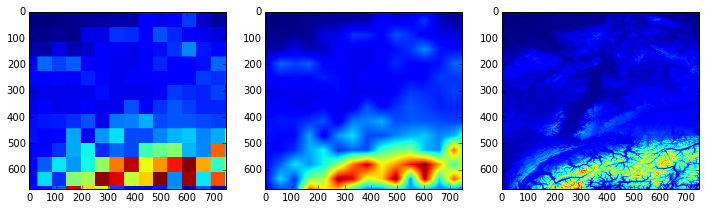

In [42]:
fig, ax = plt.subplots(1,3,figsize=(12,8))

ax[0].imshow(resLowResDEMNear)
ax[1].imshow(resLowResDEM)
ax[2].imshow(highResDEM)

In [72]:
elevcor = highResDEM - resLowResDEMNear
lapse_rate = 0.006
temp_1 = TEMPnear - lapse_rate * elevcor

elevcor = highResDEM - resLowResDEMNear
temp_2 = TEMPlin - lapse_rate * elevcor

elevcor = highResDEM - resLowResDEM
temp_3 = TEMPlin - lapse_rate * elevcor

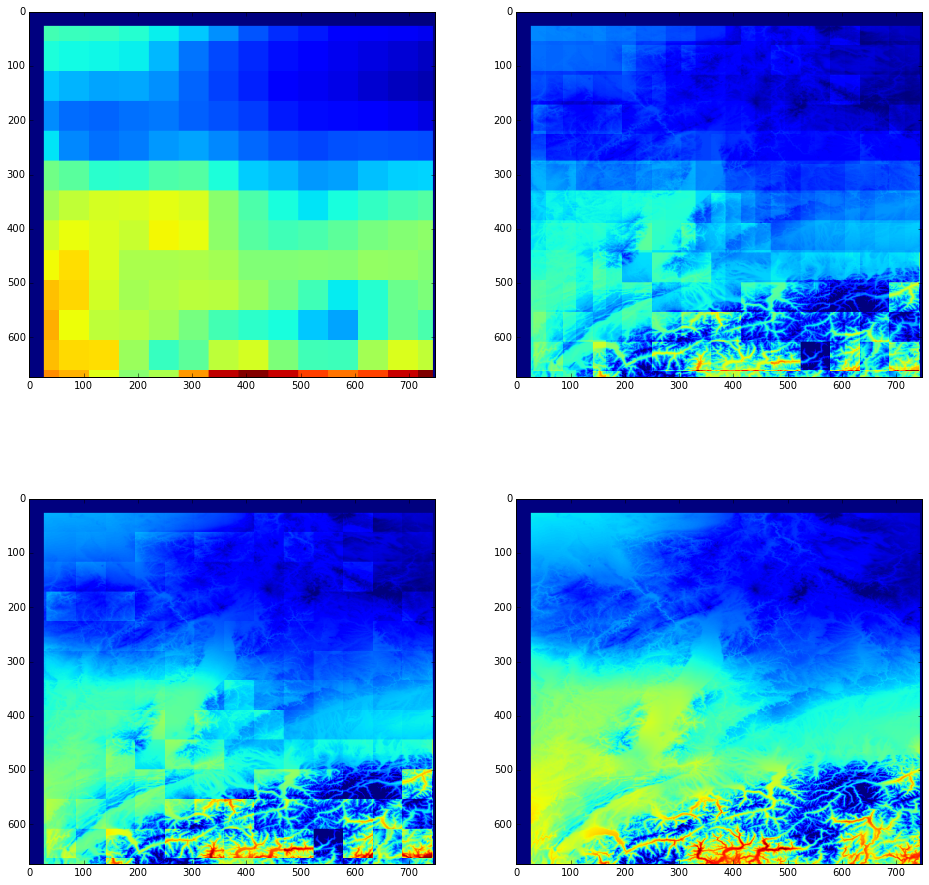

In [78]:
fig, ax = plt.subplots(2,2,figsize=(16,16))

ax[0][0].imshow(maximum(256,TEMPnear))
ax[0][1].imshow(maximum(256,temp_1))
ax[1][0].imshow(maximum(256,temp_2))
ax[1][1].imshow(maximum(256,temp_3))

